### DQN
![](./image/DQN.jpg)

In [1]:
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
from brain.DQN import DeepQNetwork
from utils import *
import gym
import time
import pandas
import numpy as np
import ipdb
import pickle
from tqdm import tqdm
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
%matplotlib inline

In [2]:
env = gym.make('CartPole-v0')
agent = DeepQNetwork(env.action_space.n, env.observation_space.shape[0],
                     learning_rate=0.005,
                     reward_decay=0.9,
                     e_greedy=0.9,
                     replace_target_iter=200,
                     memory_size=2000,)

In [3]:
final_rewards, step = [], 0
for episode in tqdm(range(1000)):
    # initial observation
    observation = env.reset()
    rewards = []

    t = 0
    while True:
        # RL choose action based on observation
        action = agent.choose_action(observation)

        # RL take action and get next observation and reward
        observation_, reward, done, info = env.step(action)
        rewards.append(reward)
        if done:
            reward = -200

        agent.store_transition(observation, action, reward, observation_)

        if (step > 200) and (step % 5 == 0):
            agent.learn()

        # swap observation
        observation = observation_

        # break while loop when end of this episode
        if done:
            break
        step += 1
    final_rewards.append(np.sum(rewards))

100%|██████████| 1000/1000 [02:31<00:00,  6.60it/s]


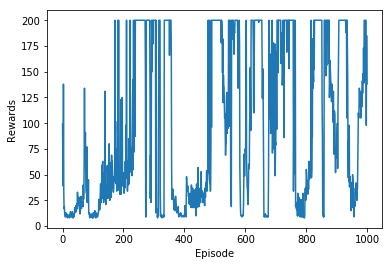

In [4]:
x = np.arange(len(final_rewards))
plt.plot(x, final_rewards)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.savefig('./image/DQN-cartpole.png')